In [1]:
import numpy as np
import pandas as pd
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
from tensorflow.keras.optimizers import Adam 
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
import math
import matplotlib.pyplot as plt
from statistics import mean

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')
# %cd /content/drive/MyDrive/Dataset TA/BRI/BBRI Q

Mounted at /content/drive
/content/drive/MyDrive/Dataset TA/BRI/BBRI Q


In [3]:
data = pd.read_csv('BBRI Q.csv')
data

,Kuartal,Laba Rugi
0,Q1/2011,3260432
1,Q2/2011,6786901
2,Q3/2011,10436174
3,Q4/2011,15296501
4,Q1/2012,4673092
5,Q2/2012,8959546
6,Q3/2012,13631299
7,Q4/2012,18681350
8,Q1/2013,5276591
9,Q2/2013,9325652


# Preprocessing

In [4]:
def transform(data):
  j = 0
  k = j + 3
  while k <= len(data):
    l = k
    while l != j :
      a = data["Laba Rugi"][l] - data["Laba Rugi"][l-1]
      data["Laba Rugi"][l] = a
      l -= 1
    j = k + 1
    k = j + 3
    
  return data

data = transform(data)
data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Kuartal,Laba Rugi
0,Q1/2011,3260432
1,Q2/2011,3526469
2,Q3/2011,3649273
3,Q4/2011,4860327
4,Q1/2012,4673092
5,Q2/2012,4286454
6,Q3/2012,4671753
7,Q4/2012,5050051
8,Q1/2013,5276591
9,Q2/2013,4049061


In [5]:
# data.to_excel('transformed data BBRI M.xlsx')

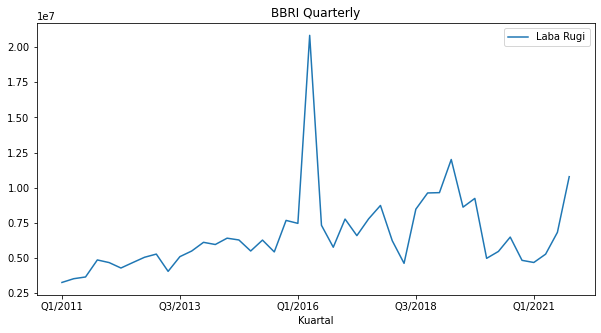

In [6]:
data = data.set_index("Kuartal")
# data.drop(["Kuartal"], axis=1, inplace=True)
data.plot(title="BBRI Quarterly", figsize=(10,5))

In [7]:
scaler = MinMaxScaler()

data[['Laba Rugi']] = scaler.fit_transform(data[['Laba Rugi']])
data

,Laba Rugi
Kuartal,
Q1/2011,0.000000
Q2/2011,0.015142
Q3/2011,0.022132
Q4/2011,0.091063
Q1/2012,0.080406
Q2/2012,0.058399
Q3/2012,0.080330
Q4/2012,0.101861
Q1/2013,0.114756


In [8]:
split = int(round(len(data)*.75,0))
data_train = data[:split] #time series as train data (75%)
data_test = data[split:] #time series as test data (25%)

data_train_arr = data_train.to_numpy()
data_test_arr = data_test.to_numpy()

train = np.reshape(data_train_arr, (data_train_arr.shape[0]))
test = np.reshape(data_test_arr, (data_test_arr.shape[0]))

In [9]:
print("% data test: ", len(data_test)/len(data)*100)

% data test:  25.0


In [10]:
#input sampling timeseries
n_sampling = 4

def split_sequence(sequence, n_steps):
	_X, _y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		_X.append(seq_x)
		_y.append(seq_y)
	return np.array(_X), np.array(_y)

x_train, y_train = split_sequence(train, n_sampling)
x_test, y_test = split_sequence(test, n_sampling)

In [11]:
print("Train X: ", len(x_train))
print("Train Y: ", len(y_train))
print("Test X: ", len(x_test))
print("Test Y: ", len(y_test))

Train X:  29
Train Y:  29
Test X:  7
Test Y:  7


# Learning Rate

In [ ]:
learning_rate = 0
j = 1
lr_history = []
for i in range (6):
  while j >= 1:
    n = n_sampling
    input = n + 1
    layer1 = input
    output = 1
    tf.random.set_seed(100)
    #Ultilize Learning Rate
    learning_rate = round(j * 10**-i,6)
    epoch = 100
    
    #define Optimizer
    adam = Adam(learning_rate=learning_rate, beta_1=0.9, beta_2=0.999, amsgrad=False)

    # define model
    model1 = Sequential()
    model1.add(Dense(input, activation='relu', input_dim=n))
    model1.add(Dense(layer1, activation='relu'))
    model1.add(Dense(output, activation='linear'))
    model1.compile(optimizer=adam, loss='mse')

    # fit model
    history = model1.fit(x_train, y_train, epochs=epoch, verbose=0)

    #Collect Average Loss History
    loss = history.history["loss"]
    loss = mean(loss)

    #Calculate MSE for training
    train_pred = model1.predict(x_train, verbose=0)
    msetrain = mean_squared_error(y_train, train_pred)

    #Calculate MSE for testing
    test_pred = model1.predict(x_test, verbose=0)
    msetest = mean_squared_error(y_test, test_pred)

    #Store loss value into list
    lr_history.append([learning_rate,loss,msetrain,msetest])

    j -= 1
  j = 9
    

In [ ]:
lr_history_model = pd.DataFrame(lr_history, columns = ['Learning Rate', 'Average Loss', 'MSE Train', 'MSE Test'])
lr_history_model

,Learning Rate,Average Loss,MSE Train,MSE Test
0,1.00000,0.105116,0.030315,0.035615
1,0.90000,0.070862,0.030314,0.035134
2,0.80000,0.055279,0.030315,0.035605
3,0.70000,0.442575,0.030319,0.034601
4,0.60000,0.045593,0.030319,0.035910
5,0.50000,0.140737,0.030339,0.036691
6,0.40000,0.076921,0.030314,0.035178
7,0.30000,0.042712,0.030314,0.035039
8,0.20000,0.042787,0.030315,0.035642
9,0.10000,0.044618,0.030314,0.035187


In [ ]:
lr_history_model = pd.DataFrame(lr_history, columns = ['Learning Rate', 'Average Loss', 'MSE Train', 'MSE Test'])

#file name excel
file_name = 'learning rate history v2 75 25.xlsx'

#saving to excel
lr_history_model.to_excel(file_name)
print("DataFrame is written to Excel File successfully")

# data_history_model

DataFrame is written to Excel File successfully


In [ ]:
#The best Learning Rate is 0.3

# Epoch

In [ ]:
epoch_history = []
for i in range(1000):
  #define param
  n = n_sampling
  input = n + 1
  layer1 = input
  output = 1
  learning_rate = 0.3
  epoch = i+1
  tf.random.set_seed(100)

  #define Optimizer
  adam = Adam(learning_rate=learning_rate, beta_1=0.9, beta_2=0.999, amsgrad=False)

  # define model
  model2 = Sequential()
  model2.add(Dense(input, activation='relu', input_dim=n))
  model2.add(Dense(layer1, activation='relu'))
  model2.add(Dense(output, activation='linear'))
  model2.compile(optimizer=adam, loss='mse')

  # fit model 
  history = model2.fit(x_train, y_train, epochs=epoch, verbose=0)

  #Collect Average Loss History
  loss = history.history["loss"]
  loss = mean(loss)

  #Calculate MSE for training
  train_pred = model2.predict(x_train, verbose=0)
  msetrain = mean_squared_error(y_train, train_pred)

  #Calculate MSE for testing
  test_pred = model2.predict(x_test, verbose=0)
  msetest = mean_squared_error(y_test, test_pred)

  #Store loss value into list
  epoch_history.append([epoch,loss,msetrain,msetest])


In [ ]:
epoch_history_model = pd.DataFrame(epoch_history, columns = ['Epoch', 'Average Loss', 'MSE Train', 'MSE Test'])

#file name excel
file_name = 'epoch history v2 75 25.xlsx'

#saving to excel
epoch_history_model.to_excel(file_name)
print("DataFrame is written to Excel File successfully")

# data_history_model

DataFrame is written to Excel File successfully


In [ ]:
#epoch = 38

# 1 Hidden Layer

In [ ]:
layer1_history = []
for i in range(500):
  #define param
  n = n_sampling
  input = n + 1
  layer1 = i+1
  output = 1
  learning_rate = 0.3
  epoch = 38
  tf.random.set_seed(100)

  #define Optimizer
  adam = Adam(learning_rate=learning_rate, beta_1=0.9, beta_2=0.999, amsgrad=False)

  # define model
  model3 = Sequential()
  model3.add(Dense(input, activation='relu', input_dim=n))
  model3.add(Dense(layer1, activation='relu'))
  model3.add(Dense(output, activation='linear'))
  model3.compile(optimizer=adam, loss='mse')

  # fit model 
  history = model3.fit(x_train, y_train, epochs=epoch, verbose=0)

  #Calculate Average Loss
  loss = history.history["loss"]
  loss = mean(loss)

  #Calculate MSE for training
  train_pred = model3.predict(x_train, verbose=0)
  msetrain = mean_squared_error(y_train, train_pred)

  #Calculate MSE for Testing
  test_pred = model3.predict(x_test, verbose=0)
  msetest = mean_squared_error(y_test, test_pred)

  layer1_history.append([layer1,loss,msetrain,msetest])

In [ ]:
layer1_history_model = pd.DataFrame(layer1_history, columns = ['layer 1', 'average loss', 'MSE Train', 'MSE Test'])

#file name excel
file_name = 'layer 1 history v2.xlsx'

#saving to excel
layer1_history_model.to_excel(file_name)
print("DataFrame is written to Excel File successfully")

# data_history_model

DataFrame is written to Excel File successfully


In [ ]:
#1 hidden layer = 13

# 2 Hidden Layer

In [ ]:
layer2_history = []
for i in range(500):
  #define param
  n = n_sampling
  input = n + 1
  layer1 = 13
  layer2 = i+1
  output = 1
  learning_rate = 0.3
  epoch = 38
  tf.random.set_seed(100)

  #define Optimizer
  adam = Adam(learning_rate=learning_rate, beta_1=0.9, beta_2=0.999, amsgrad=False)

  # define model
  model4 = Sequential()
  model4.add(Dense(input, activation='relu', input_dim=n))
  model4.add(Dense(layer1, activation='relu'))
  model4.add(Dense(layer2, activation='relu'))
  model4.add(Dense(output, activation='linear'))
  model4.compile(optimizer=adam, loss='mse')

  # fit model 
  history = model4.fit(x_train, y_train, epochs=epoch, verbose=0)

  #Calculate Average Loss
  loss = history.history["loss"]
  loss = mean(loss)

  #Calculate MSE for training
  train_pred = model4.predict(x_train, verbose=0)
  msetrain = mean_squared_error(y_train, train_pred)

  #Calculate MSE for Testing
  test_pred = model4.predict(x_test, verbose=0)
  msetest = mean_squared_error(y_test, test_pred)

  layer2_history.append([layer2,loss,msetrain,msetest])

In [ ]:
layer2_history_model = pd.DataFrame(layer2_history, columns = ['layer 2', 'average loss', 'MSE Train', 'MSE Test'])

#file name excel
file_name = 'layer 2 history v2 75 25 quarterly.xlsx'

#saving to excel
layer2_history_model.to_excel(file_name)
print("DataFrame is written to Excel File successfully")

# data_history_model

DataFrame is written to Excel File successfully


# Combined

Training

In [12]:
#define param
n = n_sampling
input = n + 1
layer1 = 13
layer2 = 4
output = 1
learning_rate = 0.3
epoch = 1500

tf.random.set_seed(100)

#define Optimizer
adam = Adam(learning_rate=learning_rate, beta_1=0.9, beta_2=0.999, amsgrad=False)

# define model
model5 = Sequential()
model5.add(Dense(input, activation='relu', input_dim=n))
model5.add(Dense(layer1, activation='relu'))
model5.add(Dense(layer2, activation='relu'))
model5.add(Dense(output, activation='linear'))
model5.compile(optimizer=adam, loss='mse')

# fit model 
history = model5.fit(x_train, y_train, epochs=epoch, verbose=0)

In [ ]:
#alasan pilih parameter tersebut adalah mencari yang paling seimbang antara loss, volatilitas pada seluruh data, dan simplicity

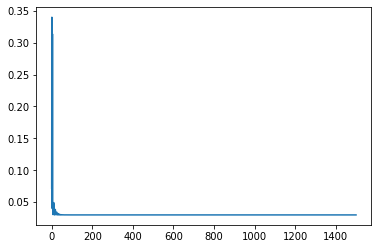

In [13]:
plt.plot(history.history['loss'])

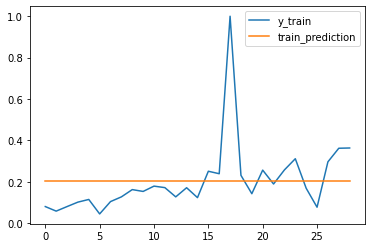

In [14]:
# plot train model
train_prediction = model5.predict(x_train, verbose=0)

train_prediction = np.reshape(train_prediction, (train_prediction.shape[0]))

Tanggal = data[:split].index.to_numpy()
Tanggal = Tanggal[n_sampling:]

#Plot test and prediction model
y_PD =  pd.DataFrame(data={'Tanggal':Tanggal, 'y_train':y_train},   
              index=Tanggal,    
              columns=['Tanggal', 'y_train'])  

train_prediction_PD = pd.DataFrame(data={'Tanggal':Tanggal, 'train_prediction':train_prediction},   
              index=Tanggal,    
              columns=['Tanggal', 'train_prediction']) 

Final_PD = pd.merge(y_PD, train_prediction_PD, on='Tanggal', how='left')

Final_PD[['y_train','train_prediction']].plot()

In [ ]:
# Final_PD.index = pd.to_datetime(Final_PD.Tanggal)
# Final_PD.drop(["Tanggal"], axis=1, inplace=True)

# Final_PD_inv = scaler.inverse_transform(Final_PD)
# Final_PD_model = pd.DataFrame(Final_PD_inv, columns = ['Actual Training Data','Prediction Training Data'])

# Final_PD_model.to_excel('Training Result v3 n_sampling=12 BBRI Quarterly.xlsx')

In [15]:
y_PD.drop(["Tanggal"], axis=1, inplace=True)
train_prediction_PD.drop(["Tanggal"], axis=1, inplace=True)

y_PD_arr = y_PD.to_numpy()
y_prediction_PD_arr = train_prediction_PD.to_numpy()

In [16]:
mse = mean_squared_error(y_PD_arr, y_prediction_PD_arr)
print("Akurasi", (1-mse))
print("MSE: ", mse)

Akurasi 0.970142471546538
MSE:  0.029857528453462023


Testing

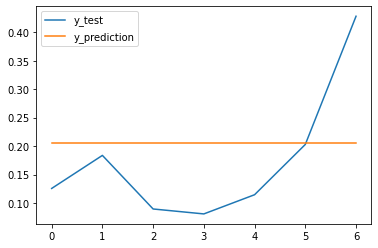

In [17]:
# test model
y_prediction = model5.predict(x_test, verbose=0)

y_prediction = np.reshape(y_prediction, (y_prediction.shape[0]))

Tanggal = data[split:].index.to_numpy()
Tanggal = Tanggal[n_sampling:]

#Plot test and prediction model
y_PD =  pd.DataFrame(data={'Tanggal':Tanggal, 'y_test':y_test},   
              index=Tanggal,    
              columns=['Tanggal', 'y_test'])  

y_prediction_PD = pd.DataFrame(data={'Tanggal':Tanggal, 'y_prediction':y_prediction},   
              index=Tanggal,    
              columns=['Tanggal', 'y_prediction']) 

Final_PD = pd.merge(y_PD, y_prediction_PD, on='Tanggal', how='left')

Final_PD[['y_test','y_prediction']].plot()

In [ ]:
# Final_PD.index = pd.to_datetime(Final_PD.Tanggal)
# Final_PD.drop(["Tanggal"], axis=1, inplace=True)

# Final_PD_inv = scaler.inverse_transform(Final_PD)
# Final_PD_model = pd.DataFrame(Final_PD_inv, columns = ['Actual Testing Data','Prediction Testing Data'])

# Final_PD_model.to_excel('Prediction Result v3 n_sampling=12 BBRI Quarterly.xlsx')

Mean Square Error

In [18]:
y_PD.drop(["Tanggal"], axis=1, inplace=True)
y_prediction_PD.drop(["Tanggal"], axis=1, inplace=True)

y_PD_arr = y_PD.to_numpy()
y_prediction_PD_arr = y_prediction_PD.to_numpy()

In [19]:
mse = mean_squared_error(y_PD_arr, y_prediction_PD_arr)
print("Akurasi", (1-mse))
print("MSE: ", mse)

Akurasi 0.9866314300068264
MSE:  0.013368569993173596


Export Final Model

In [ ]:
# #Saving Model
# model5.save('BBRI M 60 0.005 50 mse=0.004772')

# #Load Model
# # model = keras.models.load_model('path/to/location')

INFO:tensorflow:Assets written to: BBRI M 60 0.005 50 mse=0.004772/assets


In [ ]:
# #export model using pickel
# import pickle

# #save model to disk
# filename = 'BBRI M 60 0.005 50 mse=0.004772.sav'
# pickle.dump(model5, open(filename, 'wb'))

# # load the model from disk
# # loaded_model = pickle.load(open(filename, 'rb'))
# # result = loaded_model.score(X_test, Y_test)
# # print(result)

INFO:tensorflow:Assets written to: ram://84bbe153-89fd-43e9-bb8a-39002433a621/assets


In [ ]:
# #export model using joblib
# import joblib

# # save the model to disk
# # filename = 'finalized_model.sav'
# # joblib.dump(model, filename)

# # load the model from disk
# model_name = 'BBRI M 8 0.008 161 loss=0.00609.sav'
# loaded_model = joblib.load(model_name)
# # result = loaded_model.predict(x_test, y_test)
# # print(result)

In [ ]:
# loaded_model.weights

[<tf.Variable 'dense_13/kernel:0' shape=(5, 6) dtype=float32, numpy=
 array([[ 0.4728928 , -0.20804167, -0.8398208 , -0.6216376 ,  0.24435224,
          0.18924084],
        [ 0.1258476 , -0.82959116, -0.26968738, -0.5856874 ,  1.1913812 ,
         -0.5835206 ],
        [ 0.23100875, -0.22577332,  0.80493826,  0.0448702 , -0.10766881,
          0.72420526],
        [ 0.37208772,  0.36150286,  0.10642855, -0.5134552 ,  0.21437846,
         -0.09376506],
        [ 0.6509784 , -0.6006384 , -0.47103286, -0.35389954,  0.3349238 ,
          0.4597595 ]], dtype=float32)>,
 <tf.Variable 'dense_13/bias:0' shape=(6,) dtype=float32, numpy=
 array([-0.03140027, -0.10985053, -0.1374046 ,  0.        , -0.09625794,
         0.07550149], dtype=float32)>,
 <tf.Variable 'dense_14/kernel:0' shape=(6, 8) dtype=float32, numpy=
 array([[-0.13460448,  0.21763717,  0.7874137 , -0.2642669 , -0.66650474,
         -0.41222557,  0.4523649 ,  0.19247651],
        [ 0.21431172, -0.05113324,  0.46321395,  0.03421104